# Creditworthiness classification

##### The aim of the project is to create a classification model that will predict creditworthiness.

## Import libraries 

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import joblib

## Data loading

In [242]:
data = pd.read_csv('./credit-data.csv')

In [243]:
data

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,?100-?1000,< 1yr,1,NaN,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,?100-?1000,< 1yr,1,NaN,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,NaN,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,NaN,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,NaN,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,?100-?1000,< 1yr,1,NaN,1.0,1,NaN,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,?100-?1000,< 1yr,1,NaN,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,?100-?1000,< 1yr,2,NaN,NaN,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,?100-?1000,4-7 yrs,2,NaN,NaN,4,63.0,Other Banks/Depts,3,1,1,1,2,1


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               202 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         43 non-null     object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

## Data cleaning

In [245]:
data.isna().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                 298
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                           457
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [246]:
data['Value-Savings-Stocks'].value_counts()

Value-Savings-Stocks
?100-?1000    154
< ?100         48
Name: count, dtype: int64

In [247]:
data['Value-Savings-Stocks'].fillna('Unknown', inplace=True)

In [248]:
data['Guarantors'].value_counts()

Guarantors
Yes    43
Name: count, dtype: int64

In [249]:
data['Guarantors'].fillna('No', inplace=True)

In [250]:
data['Duration-in-Current-address'].value_counts()

Duration-in-Current-address
4.0    56
2.0    51
1.0    29
3.0    20
Name: count, dtype: int64

In [251]:
data.drop('Duration-in-Current-address', axis=1, inplace=True)

In [255]:
data['Age-years'] = data.groupby('Credit-Application-Result')['Age-years'].transform(lambda x: x.fillna(x.median()))

In [256]:
data

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,?100-?1000,< 1yr,1,No,1,34.0,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,?100-?1000,< 1yr,1,No,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,Unknown,1-4 yrs,2,No,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,Unknown,1-4 yrs,1,No,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,Unknown,< 1yr,4,No,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,?100-?1000,< 1yr,1,No,1,34.0,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,?100-?1000,< 1yr,1,No,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,?100-?1000,< 1yr,2,No,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,?100-?1000,4-7 yrs,2,No,4,63.0,Other Banks/Depts,3,1,1,1,2,1


In [257]:
data.isna().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [258]:
data.duplicated().sum()

0

## EDA

In [259]:
data.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.360000,35.598000,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.064268,11.365154,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,3.000000,41.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


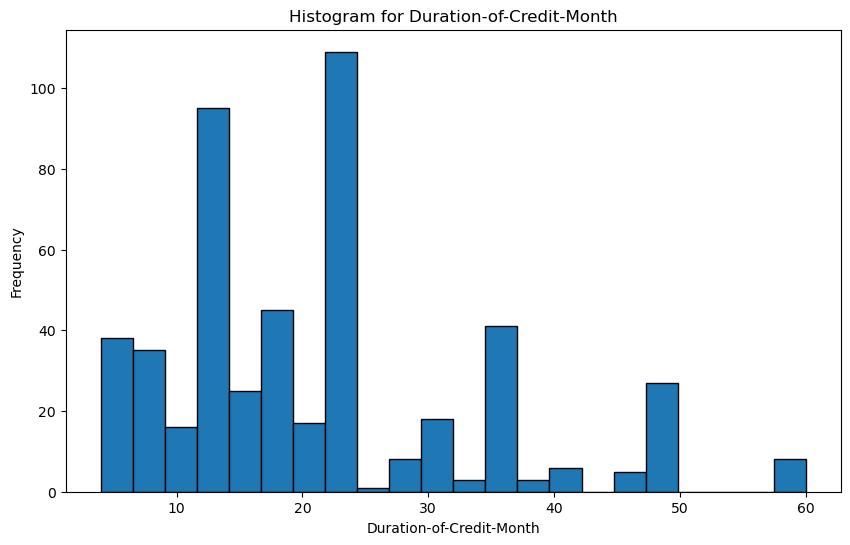

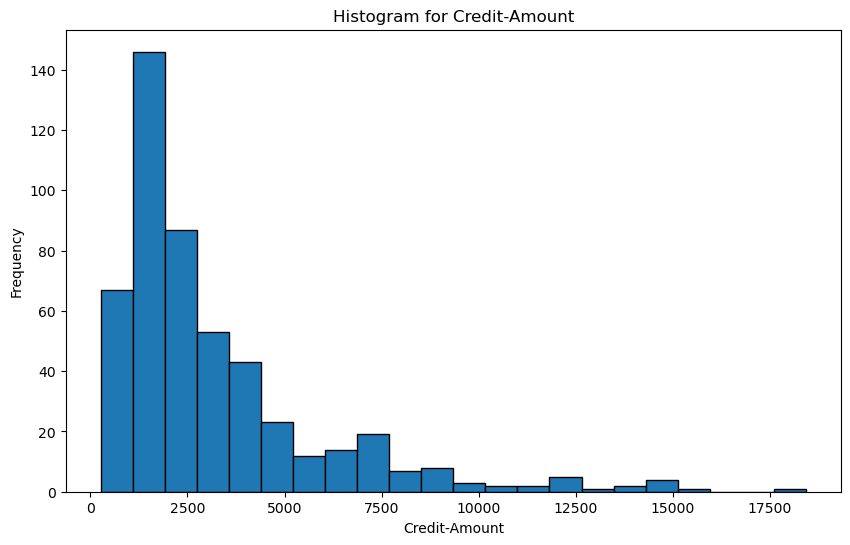

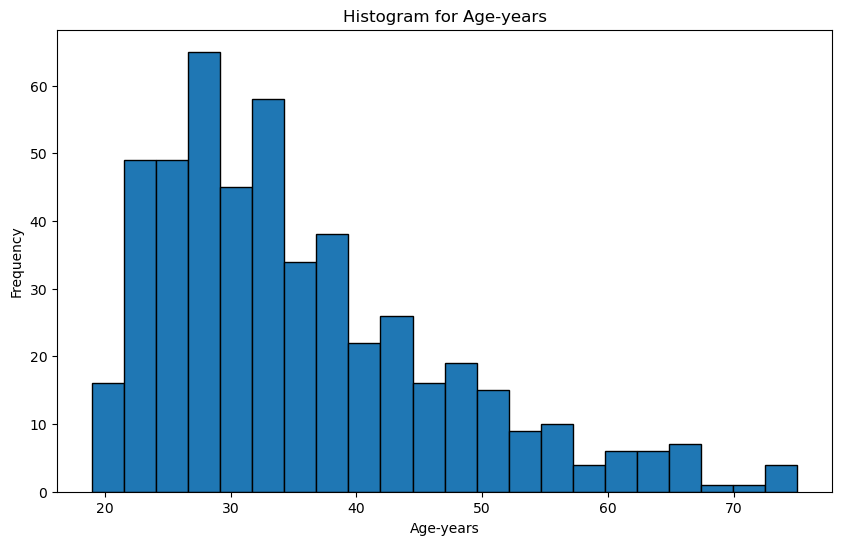

In [260]:
plt.figure(figsize=(10, 6))
plt.hist(data['Duration-of-Credit-Month'], bins=22, edgecolor='k')
plt.title('Histogram for Duration-of-Credit-Month')
plt.xlabel('Duration-of-Credit-Month')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Credit-Amount'], bins=22, edgecolor='k')
plt.title('Histogram for Credit-Amount')
plt.xlabel('Credit-Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Age-years'], bins=22, edgecolor='k')
plt.title('Histogram for Age-years')
plt.xlabel('Age-years')
plt.ylabel('Frequency')
plt.show()


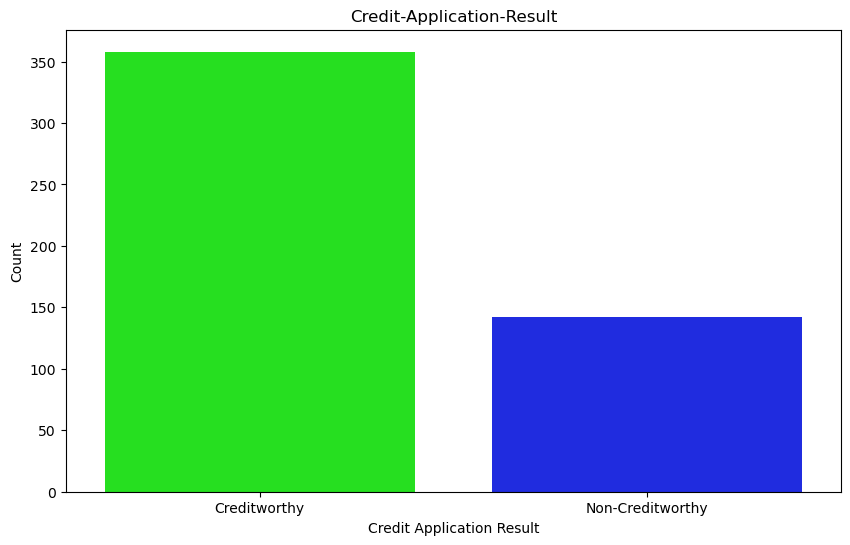

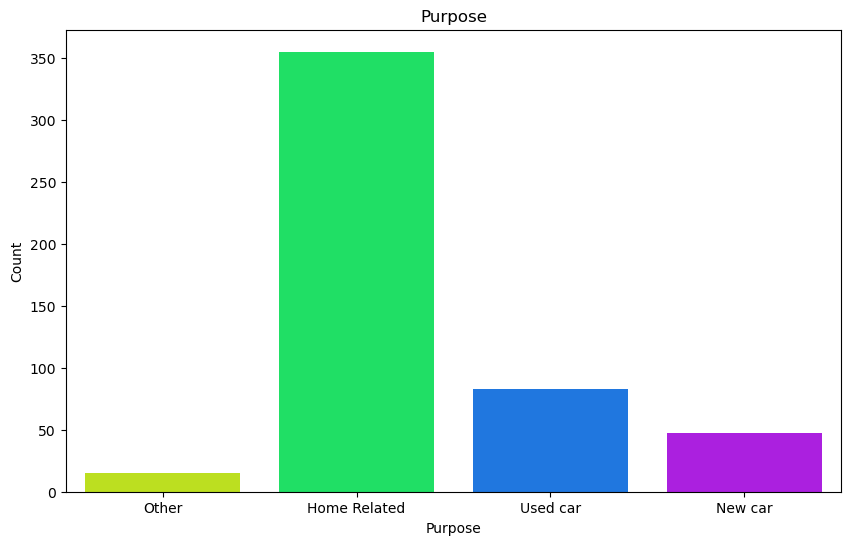

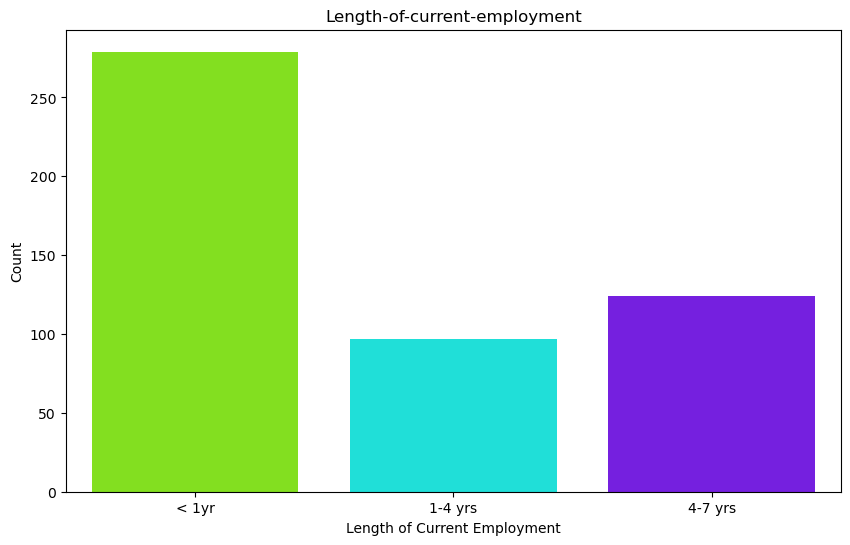

In [261]:
palette = sns.color_palette("hsv", len(data['Credit-Application-Result'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='Credit-Application-Result', data=data, palette=palette)
plt.title('Credit-Application-Result')
plt.xlabel('Credit Application Result')
plt.ylabel('Count')
plt.show()

palette = sns.color_palette("hsv", len(data['Purpose'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', data=data, palette=palette)
plt.title('Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

palette = sns.color_palette("hsv", len(data['Length-of-current-employment'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='Length-of-current-employment', data=data, palette=palette)
plt.title('Length-of-current-employment')
plt.xlabel('Length of Current Employment')
plt.ylabel('Count')
plt.show()

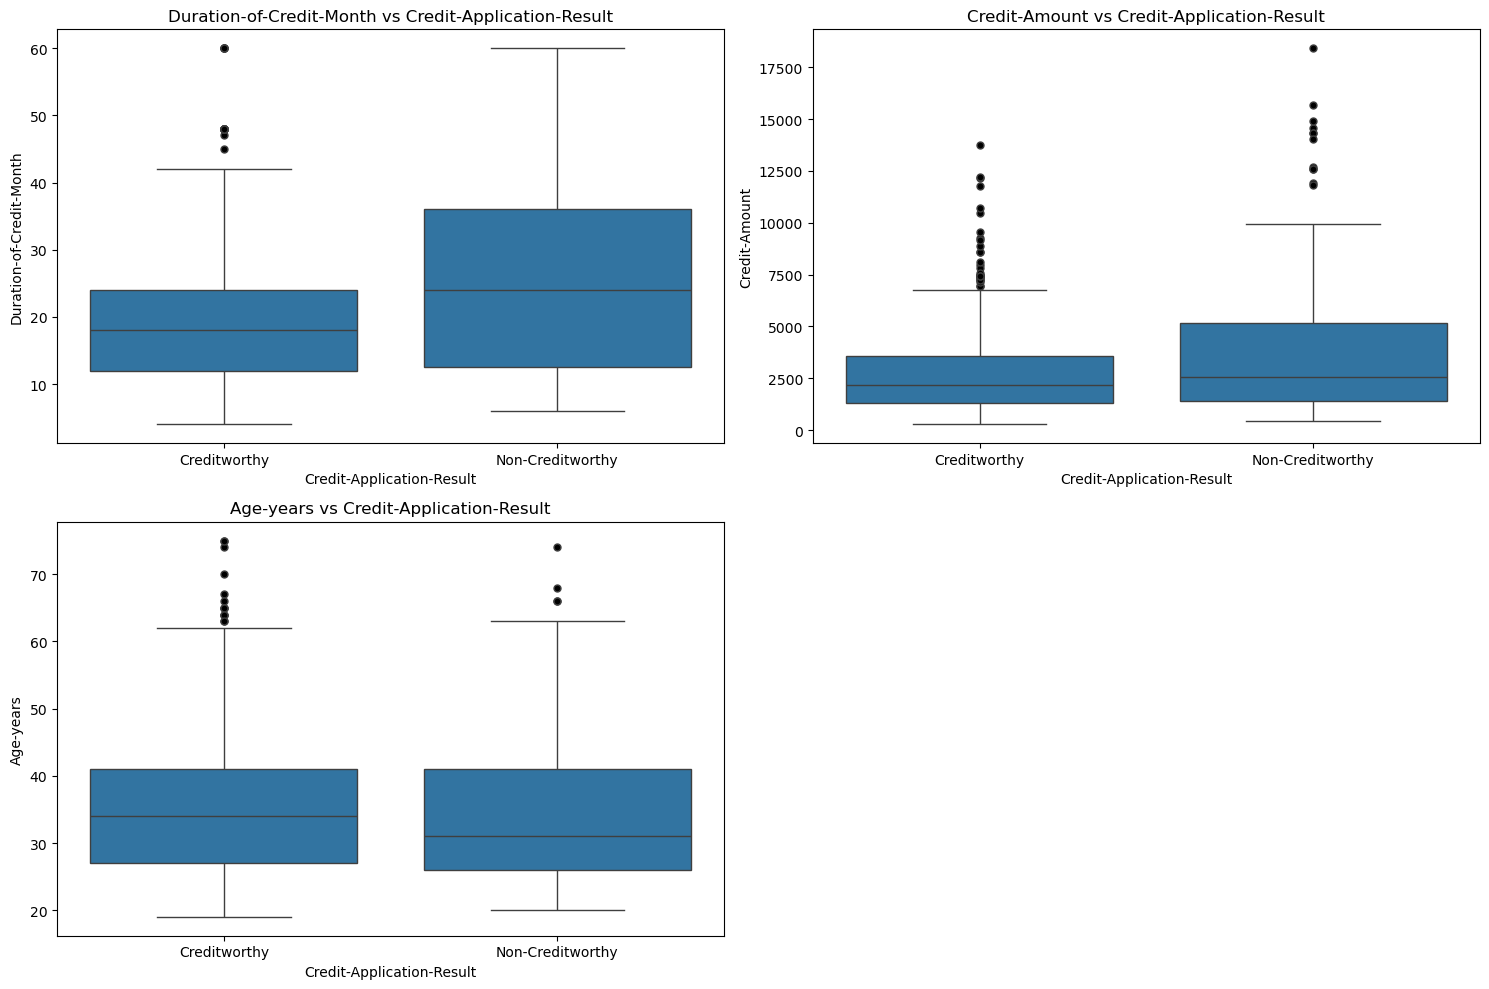

In [262]:
flierprops = dict(marker='o', markerfacecolor='black', markersize=5, linestyle='none')

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Credit-Application-Result', y='Duration-of-Credit-Month', data=data, flierprops=flierprops)
plt.title('Duration-of-Credit-Month vs Credit-Application-Result')

plt.subplot(2, 2, 2)
sns.boxplot(x='Credit-Application-Result', y='Credit-Amount', data=data, flierprops=flierprops)
plt.title('Credit-Amount vs Credit-Application-Result')

plt.subplot(2, 2, 3)
sns.boxplot(x='Credit-Application-Result', y='Age-years', data=data, flierprops=flierprops)
plt.title('Age-years vs Credit-Application-Result')

plt.tight_layout()
plt.show()

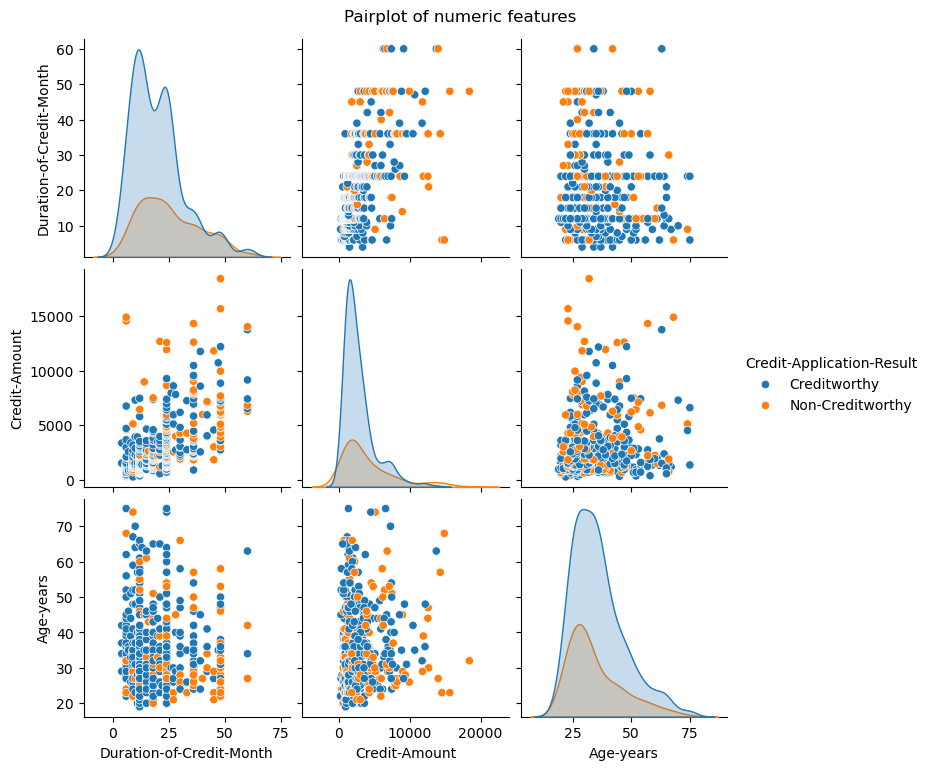

In [263]:
pairplot = sns.pairplot(data, hue='Credit-Application-Result', diag_kind='kde', vars=['Duration-of-Credit-Month', 'Credit-Amount', 'Age-years'])
pairplot.fig.suptitle('Pairplot of numeric features', y=1.02)
plt.show()

In [264]:
numeric_cols = data.select_dtypes(include=['number']).columns
df_numeric = data[numeric_cols]

correlation_matrix = df_numeric.corr()
correlation_matrix

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
Duration-of-Credit-Month,1.000000,0.573980,0.068106,0.299855,-0.064583,0.152516,NaN,-0.065269,0.143176,-0.115916
Credit-Amount,0.573980,1.000000,-0.288852,0.325545,0.068927,0.170071,NaN,0.003986,0.286338,0.025493
Instalment-per-cent,0.068106,-0.288852,1.000000,0.081493,0.039583,0.074533,NaN,-0.125894,0.029354,-0.133411
Most-valuable-available-asset,0.299855,0.325545,0.081493,1.000000,0.085385,0.373101,NaN,0.046454,0.203509,-0.146005
Age-years,-0.064583,0.068927,0.039583,0.085385,1.000000,0.328781,NaN,0.117406,0.174895,-0.004019
Type-of-apartment,0.152516,0.170071,0.074533,0.373101,0.328781,1.000000,NaN,0.170738,0.101443,-0.089848
Occupation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No-of-dependents,-0.065269,0.003986,-0.125894,0.046454,0.117406,0.170738,NaN,1.000000,-0.048559,0.065943
Telephone,0.143176,0.286338,0.029354,0.203509,0.174895,0.101443,NaN,-0.048559,1.000000,-0.055516
Foreign-Worker,-0.115916,0.025493,-0.133411,-0.146005,-0.004019,-0.089848,NaN,0.065943,-0.055516,1.000000


In [265]:
data['Occupation'].value_counts()

Occupation
1    500
Name: count, dtype: int64

In [266]:
df = data.drop(columns='Occupation')

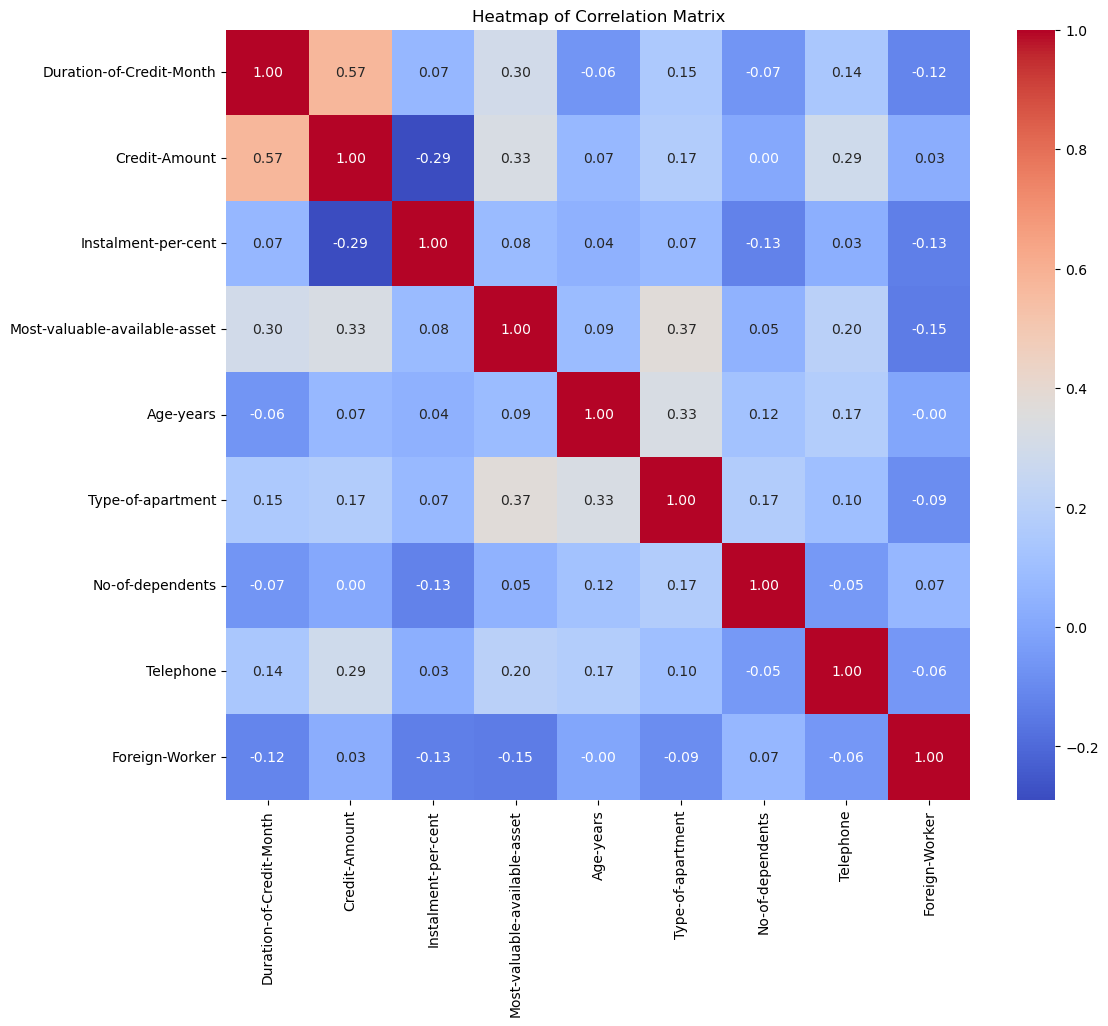

In [267]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

correlation_matrix = df_numeric.corr()
correlation_matrix

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Features coding

In [268]:
df

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,?100-?1000,< 1yr,1,No,1,34.0,Other Banks/Depts,2,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,?100-?1000,< 1yr,1,No,1,29.0,Other Banks/Depts,2,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,Unknown,1-4 yrs,2,No,1,42.0,Other Banks/Depts,2,More than 1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,Unknown,1-4 yrs,1,No,1,37.0,Other Banks/Depts,2,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,Unknown,< 1yr,4,No,1,27.0,Other Banks/Depts,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,?100-?1000,< 1yr,1,No,1,34.0,Other Banks/Depts,2,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,?100-?1000,< 1yr,1,No,1,27.0,Other Banks/Depts,2,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,?100-?1000,< 1yr,2,No,4,27.0,Other Banks/Depts,3,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,?100-?1000,4-7 yrs,2,No,4,63.0,Other Banks/Depts,3,1,1,2,1


In [269]:
df['Concurrent-Credits'].value_counts()

Concurrent-Credits
Other Banks/Depts    500
Name: count, dtype: int64

In [270]:
df = df.drop(columns='Concurrent-Credits')

In [271]:
df

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,?100-?1000,< 1yr,1,No,1,34.0,2,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,?100-?1000,< 1yr,1,No,1,29.0,2,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,Unknown,1-4 yrs,2,No,1,42.0,2,More than 1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,Unknown,1-4 yrs,1,No,1,37.0,2,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,Unknown,< 1yr,4,No,1,27.0,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,?100-?1000,< 1yr,1,No,1,34.0,2,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,?100-?1000,< 1yr,1,No,1,27.0,2,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,?100-?1000,< 1yr,2,No,4,27.0,3,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,?100-?1000,4-7 yrs,2,No,4,63.0,3,1,1,2,1


In [272]:
df['Credit-Application-Result'] = df['Credit-Application-Result'].map({
    'Non-Creditworthy': 0,
    'Creditworthy': 1
})



In [273]:
df

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,No-of-dependents,Telephone,Foreign-Worker
0,1,Some Balance,4,Paid Up,Other,1494,?100-?1000,< 1yr,1,No,1,34.0,2,1,2,1,2
1,1,Some Balance,4,Paid Up,Home Related,1494,?100-?1000,< 1yr,1,No,1,29.0,2,1,2,1,2
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,Unknown,1-4 yrs,2,No,1,42.0,2,More than 1,2,1,1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,Unknown,1-4 yrs,1,No,1,37.0,2,1,2,1,1
4,1,No Account,6,Paid Up,Home Related,343,Unknown,< 1yr,4,No,1,27.0,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,No Account,60,No Problems (in this bank),Other,7418,?100-?1000,< 1yr,1,No,1,34.0,2,1,1,1,1
496,1,No Account,60,No Problems (in this bank),Home Related,7418,?100-?1000,< 1yr,1,No,1,27.0,2,1,1,1,1
497,1,No Account,60,No Problems (in this bank),Home Related,9157,?100-?1000,< 1yr,2,No,4,27.0,3,1,1,1,1
498,1,Some Balance,60,No Problems (in this bank),Home Related,13756,?100-?1000,4-7 yrs,2,No,4,63.0,3,1,1,2,1


In [274]:
df_encoded = pd.get_dummies(df).astype('int')

In [275]:
df_encoded

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Telephone,Foreign-Worker,...,Value-Savings-Stocks_< ?100,Value-Savings-Stocks_?100-?1000,Value-Savings-Stocks_Unknown,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_No,Guarantors_Yes,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,4,1494,1,1,34,2,2,1,2,...,0,1,0,0,0,1,1,0,1,0
1,1,4,1494,1,1,29,2,2,1,2,...,0,1,0,0,0,1,1,0,1,0
2,1,4,1544,2,1,42,2,2,1,1,...,0,0,1,1,0,0,1,0,0,1
3,1,4,3380,1,1,37,2,2,1,1,...,0,0,1,1,0,0,1,0,1,0
4,1,6,343,4,1,27,2,1,1,1,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,60,7418,1,1,34,2,1,1,1,...,0,1,0,0,0,1,1,0,1,0
496,1,60,7418,1,1,27,2,1,1,1,...,0,1,0,0,0,1,1,0,1,0
497,1,60,9157,2,4,27,3,1,1,1,...,0,1,0,0,0,1,1,0,1,0
498,1,60,13756,2,4,63,3,1,2,1,...,0,1,0,0,1,0,1,0,1,0


In [276]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   Credit-Application-Result                                     500 non-null    int32
 1   Duration-of-Credit-Month                                      500 non-null    int32
 2   Credit-Amount                                                 500 non-null    int32
 3   Instalment-per-cent                                           500 non-null    int32
 4   Most-valuable-available-asset                                 500 non-null    int32
 5   Age-years                                                     500 non-null    int32
 6   Type-of-apartment                                             500 non-null    int32
 7   No-of-dependents                                              500 non-null    int32
 8   

In [277]:
df_encoded.corr()[['Credit-Application-Result']]

,Credit-Application-Result
Credit-Application-Result,1.000000
Duration-of-Credit-Month,-0.202504
Credit-Amount,-0.201946
Instalment-per-cent,-0.062107
Most-valuable-available-asset,-0.141332
Age-years,0.054266
Type-of-apartment,-0.026516
No-of-dependents,-0.041048
Telephone,-0.028971
Foreign-Worker,0.009186


## Data standardization and transformation

In [278]:
X = df_encoded.drop('Credit-Application-Result', axis=1)
y = df_encoded['Credit-Application-Result']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [280]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [281]:
y_train_resampled.value_counts()

Credit-Application-Result
1    286
0    286
Name: count, dtype: int64

In [282]:
X_train_resampled.skew()

Duration-of-Credit-Month                                        0.947407
Credit-Amount                                                   1.926239
Instalment-per-cent                                            -0.654454
Most-valuable-available-asset                                  -0.106954
Age-years                                                       1.150429
Type-of-apartment                                              -0.019474
No-of-dependents                                                2.146691
Telephone                                                       0.276023
Foreign-Worker                                                  6.171049
Account-Balance_No Account                                     -0.430259
Account-Balance_Some Balance                                    0.430259
Payment-Status-of-Previous-Credit_No Problems (in this bank)    0.560577
Payment-Status-of-Previous-Credit_Paid Up                      -0.154709
Payment-Status-of-Previous-Credit_Some Problems    

In [283]:
columns_to_standardize = []

In [284]:
for column in X_train_resampled.columns:
    unique_values = X_train_resampled[column].unique()
    if len(unique_values) > 2:
        columns_to_standardize.append(column)

In [285]:
print(columns_to_standardize)

['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent', 'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment']


In [286]:
X_train_resampled

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Telephone,Foreign-Worker,Account-Balance_No Account,...,Value-Savings-Stocks_< ?100,Value-Savings-Stocks_?100-?1000,Value-Savings-Stocks_Unknown,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_No,Guarantors_Yes,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,36,2299,4,3,39,2,1,1,1,0,...,0,1,0,0,1,0,1,0,1,0
1,12,1240,4,1,38,2,1,2,1,0,...,0,1,0,0,1,0,1,0,0,1
2,24,3749,2,3,26,2,1,1,1,0,...,0,0,1,0,0,1,1,0,1,0
3,9,2406,2,3,31,2,1,1,1,0,...,0,0,1,0,0,1,1,0,1,0
4,12,1107,2,1,20,1,2,2,1,1,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,24,3552,3,3,27,2,1,1,1,1,...,0,0,1,1,0,0,1,0,1,0
568,18,2864,2,1,34,2,2,1,1,0,...,0,0,1,0,0,1,1,0,1,0
569,36,9034,4,4,29,1,1,2,1,1,...,1,0,0,0,0,1,0,1,1,0
570,36,7980,4,3,27,1,1,2,1,0,...,0,1,0,0,0,1,1,0,0,1


In [287]:
X_train_resampled.skew()

Duration-of-Credit-Month                                        0.947407
Credit-Amount                                                   1.926239
Instalment-per-cent                                            -0.654454
Most-valuable-available-asset                                  -0.106954
Age-years                                                       1.150429
Type-of-apartment                                              -0.019474
No-of-dependents                                                2.146691
Telephone                                                       0.276023
Foreign-Worker                                                  6.171049
Account-Balance_No Account                                     -0.430259
Account-Balance_Some Balance                                    0.430259
Payment-Status-of-Previous-Credit_No Problems (in this bank)    0.560577
Payment-Status-of-Previous-Credit_Paid Up                      -0.154709
Payment-Status-of-Previous-Credit_Some Problems    

In [288]:
numerical_cols = ['Most-valuable-available-asset','Type-of-apartment']
skewed_cols = ['Duration-of-Credit-Month','Credit-Amount','Instalment-per-cent','Age-years']

In [289]:
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train_resampled

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Telephone,Foreign-Worker,Account-Balance_No Account,...,Value-Savings-Stocks_< ?100,Value-Savings-Stocks_?100-?1000,Value-Savings-Stocks_Unknown,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_No,Guarantors_Yes,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,36,2299,4,0.482415,39,0.155124,1,1,1,0,...,0,1,0,0,1,0,1,0,1,0
1,12,1240,4,-1.351081,38,0.155124,1,2,1,0,...,0,1,0,0,1,0,1,0,0,1
2,24,3749,2,0.482415,26,0.155124,1,1,1,0,...,0,0,1,0,0,1,1,0,1,0
3,9,2406,2,0.482415,31,0.155124,1,1,1,0,...,0,0,1,0,0,1,1,0,1,0
4,12,1107,2,-1.351081,20,-1.619494,2,2,1,1,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,24,3552,3,0.482415,27,0.155124,1,1,1,1,...,0,0,1,1,0,0,1,0,1,0
568,18,2864,2,-1.351081,34,0.155124,2,1,1,0,...,0,0,1,0,0,1,1,0,1,0
569,36,9034,4,1.399162,29,-1.619494,1,2,1,1,...,1,0,0,0,0,1,0,1,1,0
570,36,7980,4,0.482415,27,-1.619494,1,2,1,0,...,0,1,0,0,0,1,1,0,0,1


In [290]:
transformer = PowerTransformer()
X_train_resampled[skewed_cols] = transformer.fit_transform(X_train_resampled[skewed_cols])
X_test[skewed_cols] = transformer.transform(X_test[skewed_cols])

X_train_resampled.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Telephone,Foreign-Worker,Account-Balance_No Account,...,Value-Savings-Stocks_< ?100,Value-Savings-Stocks_?100-?1000,Value-Savings-Stocks_Unknown,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_No,Guarantors_Yes,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1.176799,-0.047368,0.916307,0.482415,0.560108,0.155124,1,1,1,0,...,0,1,0,0,1,0,1,0,1,0
1,-0.785981,-0.853948,0.916307,-1.351081,0.482446,0.155124,1,2,1,0,...,0,1,0,0,1,0,1,0,0,1
2,0.414042,0.542632,-1.071686,0.482415,-0.860329,0.155124,1,1,1,0,...,0,0,1,0,0,1,1,0,1,0
3,-1.243263,0.009285,-1.071686,0.482415,-0.186711,0.155124,1,1,1,0,...,0,0,1,0,0,1,1,0,1,0
4,-0.785981,-1.010107,-1.071686,-1.351081,-2.057279,-1.619494,2,2,1,1,...,0,0,1,0,0,1,1,0,1,0


## Model training and evaluation

In [291]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary')
    }

results_df = pd.DataFrame(results).T
print(results_df)

                              Accuracy  Precision    Recall  F1 Score
Logistic Regression               0.63   0.830189  0.611111  0.704000
Decision Tree                     0.69   0.805970  0.750000  0.776978
Random Forest                     0.74   0.848485  0.777778  0.811594
Gradient Boosting                 0.67   0.830508  0.680556  0.748092
Support Vector Machine            0.66   0.851852  0.638889  0.730159
K-Nearest Neighbors               0.61   0.851064  0.555556  0.672269
Naive Bayes                       0.69   0.847458  0.694444  0.763359
AdaBoost                          0.63   0.807018  0.638889  0.713178
Extra Trees                       0.78   0.828947  0.875000  0.851351
Linear Discriminant Analysis      0.64   0.833333  0.625000  0.714286


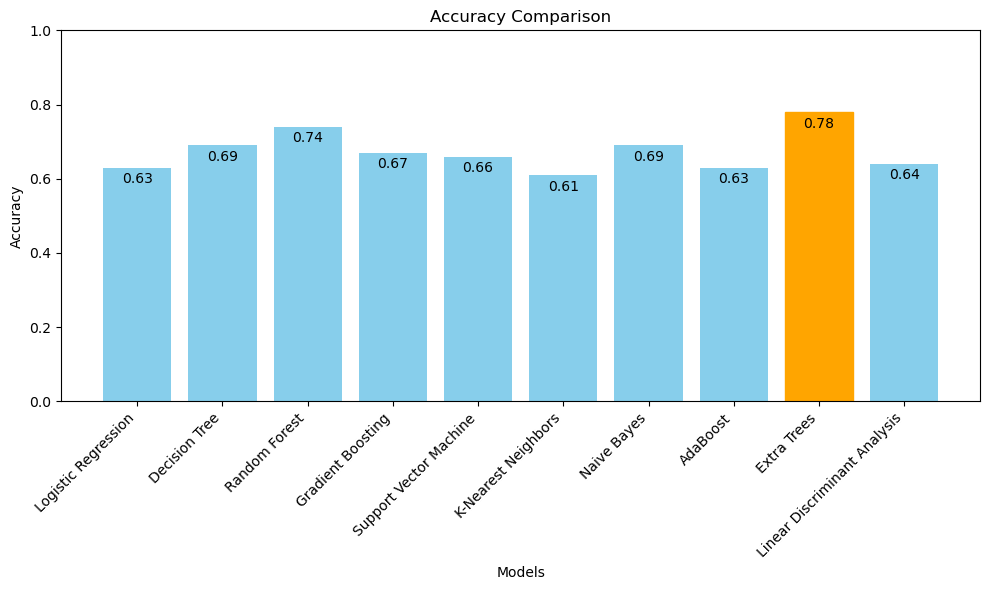

In [292]:
results = {
    "Logistic Regression": 0.63,
    "Decision Tree": 0.69,
    "Random Forest": 0.74,
    "Gradient Boosting": 0.67,
    "Support Vector Machine": 0.66,
    "K-Nearest Neighbors": 0.61,
    "Naive Bayes": 0.69,
    "AdaBoost": 0.63,
    "Extra Trees": 0.78,
    "Linear Discriminant Analysis": 0.64
}


models = list(results.keys())
accuracy_scores = list(results.values())
best_idx = np.argmax(accuracy_scores)


plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue')


bars[best_idx].set_color('orange')

plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [293]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train_resampled, y_train_resampled)
y_pred_et = et_model.predict(X_test)
cm_et = confusion_matrix(y_test, y_pred_et)
print("Confusion Matrix for Extra Trees:\n", cm_et)


Confusion Matrix for Extra Trees:
 [[15 13]
 [ 9 63]]


In [295]:
et_model = ExtraTreesClassifier(random_state=42, class_weight={0: 1000, 1: 1})
et_model.fit(X_train_resampled, y_train_resampled)
y_pred_et = et_model.predict(X_test)
cm_et = confusion_matrix(y_test, y_pred_et)
print("Confusion Matrix for Extra Trees with Class Weights:\n", cm_et)


Confusion Matrix for Extra Trees with Class Weights:
 [[17 11]
 [11 61]]


In [302]:
et_model = ExtraTreesClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [False, True]  
}

grid_search = GridSearchCV(estimator=et_model, 
                           param_grid=param_grid, 
                           scoring='f1',  
                           cv=5,  
                           n_jobs=-1,  
                           verbose=2)  

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

best_et_model = grid_search.best_estimator_

y_pred_best_et = best_et_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_et):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best_et, average='binary'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best_et, average='binary'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_et, average='binary'):.2f}")

cm_best_et = confusion_matrix(y_test, y_pred_best_et)
print("Confusion Matrix for Tuned Extra Trees:\n", cm_best_et)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.74
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Confusion Matrix for Tuned Extra Trees:
 [[15 13]
 [13 59]]


In [303]:
et_model_final = ExtraTreesClassifier(
    random_state=42,
    bootstrap=False,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    class_weight={0: 1000, 1: 1}  
)

et_model_final.fit(X_train_resampled, y_train_resampled)

y_pred_et = et_model_final.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_et):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_et, average='binary'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_et, average='binary'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_et, average='binary'):.2f}")

cm_et = confusion_matrix(y_test, y_pred_et)
print("Confusion Matrix for Extra Trees with Class Weights and Tuned Hyperparameters:\n", cm_et)

Accuracy: 0.80
Precision: 0.85
Recall: 0.88
F1 Score: 0.86
Confusion Matrix for Extra Trees with Class Weights and Tuned Hyperparameters:
 [[17 11]
 [ 9 63]]


## Model saving

In [304]:
joblib.dump(et_model_final,'./et_model_final.pkl')

['./et_model_final.pkl']

## Feature importance

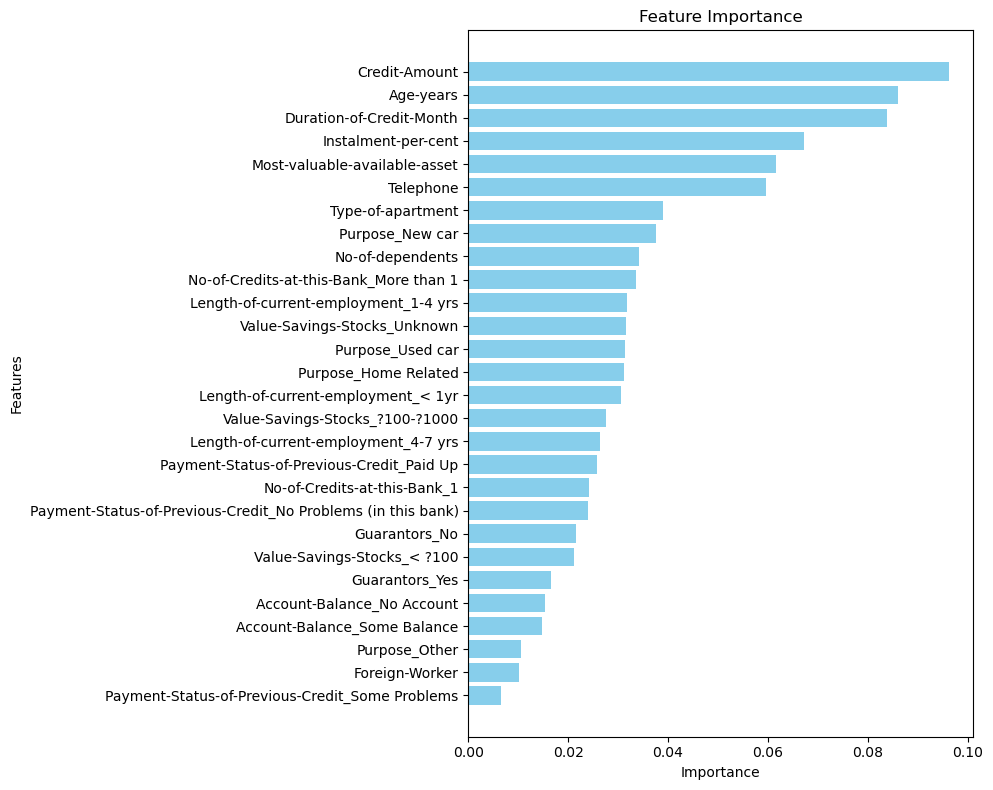

In [305]:
importances = et_model_final.feature_importances_
features = X_train_resampled.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


## Conclusions

As part of the project, various classification models were created and tested to predict the creditworthiness of customers. 
I analyzed a dataset from Kaggle.

Among the tested models, the Extra Trees model with adjusted class weights and optimal hyperparameters achieved the best results in terms of metrics such as Accuracy, Precision, Recall and F1 Score

The analysis of the importance of features showed that variables such as Credit Amount, Age, and Duration of Credit (Month) were of key importance for the model. This indicates that the loan amount and the customer's age are key determinants in predicting his creditworthiness.

The use of class balancing using weights and oversampling techniques significantly improved the model's ability to classify the minority class, which is important in the context of risk analysis.

The Extra Trees model, an example of ensemble, proved to be exceptionally effective, confirming the power of ensemble techniques in solving classification problems, especially with unbalanced data.


